In [1]:
import numpy as np
import scipy
import scipy.linalg
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

##### 1. Решите линейную систему:

$ \begin{equation} 
\begin{pmatrix}
1 & 2 & 3\\
4 & 0 & 6\\
7 & 8 & 9\\
\end{pmatrix} \cdot X = 
\begin{pmatrix}
12\\
2\\
1\\
\end{pmatrix}
\end{equation} $

In [2]:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
B = np.array([12, 2, 1])

print(' ')
X = np.linalg.solve(A, B)
print('x1 =', np.round(X[0],2), 'x2 =', np.round(X[1],2), 'x3 =', np.round(X[2],2))
      
np.dot(A, X)

 
x1 = -9.2 x2 = 0.9 x3 = 6.47


array([12.,  2.,  1.])

##### 2. Найдите псевдорешение:

$\begin{array} \ x + 2y – z = 1 \\ 3x – 4y = 7 \\ 8x – 5y + 2z = 12 \\ 2x – 5z = 7 \\ 11x +4y – 7z = 15 \end{array}$

$ \begin{equation} 
\begin{pmatrix}
1 & 2 & -1\\
3 & -4 & 0\\
8 & -5 & 2\\
2 & 0 & -5\\
11 & 4 & -7\\
\end{pmatrix} \cdot
\begin{pmatrix}
X\\
Y\\
Z\\
\end{pmatrix} = 
\begin{pmatrix}
1\\
7\\
12\\
7\\
15\\
\end{pmatrix}
\end{equation} $

In [3]:
A = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, 0, -5], [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15])
np.linalg.lstsq(A, B)

(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

In [4]:
X = np.round(np.dot(A, [1.13919353, -0.90498444, -0.9009803]),2)
X

array([ 0.23,  7.04, 11.84,  6.78, 15.22])

In [5]:
d = X-B
d

array([-0.77,  0.04, -0.16, -0.22,  0.22])

In [6]:
np.round((np.linalg.norm(np.dot(A, [1.13919353, -0.90498444, -0.9009803])-B)**2),8)

0.71523211

#### 3. Сколько решений имеет линейная система:


$ \begin{equation} 
\begin{pmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9\\
\end{pmatrix} \cdot X = 
\begin{pmatrix}
2\\
5\\
1\\
\end{pmatrix}
\end{equation} $

#### Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее. 

Создадим расшииренную матрицу 'C' и сравним ее ранг с рангом исходной матрицы 'A'. Если ранг 'C' > ранга 'A', то система решений не имеет.

In [7]:
A = np.array([[1,2,3], [4,5,6], [7,8,9]])
B = np.array([[2,5,1]])
C = np.concatenate((A, B.T), axis=1)
print('ранг А =', np.linalg.matrix_rank(A), 'ранг С =', np.linalg.matrix_rank(C))
if np.linalg.matrix_rank(C) > np.linalg.matrix_rank(A):
    print('система решений не имеет'); 

ранг А = 2 ранг С = 3
система решений не имеет


Пусть В будет со значениями 12, 18, 24 и проверим что получится

In [8]:
B1 = np.array([[12,18,24]])
C = np.concatenate((A, B1.T), axis=1)
print('ранг А =', np.linalg.matrix_rank(A), 'ранг С =', np.linalg.matrix_rank(C))

ранг А = 2 ранг С = 2


Решение есть:

In [9]:
B1 = np.array([12,18,24])
X = np.linalg.solve(A, B1)
print('x1 =', np.round(X[0],2), 'x2 =', np.round(X[1],2), 'x3 =', np.round(X[2],2))
      
np.dot(A, X)

x1 = -1.6 x2 = -2.8 x3 = 6.4


array([12., 18., 24.])

Посмотрим на зависимость строк и столбцов:

In [10]:
np.round(np.linalg.det(A))

-0.0

### Общий вывод: после преобразования система стала нетривиально совместна и иметь более одного решения, т.к. det основной матрицы = 0, ранги основной и расширенной матриц  равны, но меньше числа неизвестных. Т.о., приведенное выше решение является одним из множества решений.

#### 4. Вычислите LU-разложение матрицы:

$\begin{pmatrix}
1 & 2 & 3\\
2 & 16 & 21\\
4 & 28 & 73\\
\end{pmatrix}$

После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.

In [11]:
A = np.array([[1,2,3], [2,16,21], [4,28,73]])

P, L, U = scipy.linalg.lu(A)

print(P)
print(L)
print(U)

print(np.dot(P.T, A) - np.dot(L, U))

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [12]:
B1 = np.array([[12,18,24]])
C = np.concatenate((A, B1.T), axis=1)
print('ранг А =', np.linalg.matrix_rank(A), 'ранг С =', np.linalg.matrix_rank(C))
print('det =', np.round(np.linalg.det(A)))

ранг А = 3 ранг С = 3
det = 432.0


### Интересно получилось: у системы есть единственное решение

In [13]:
B1 = np.array([12,18,24])
X = np.linalg.solve(A, B1)
print('x1 =', np.round(X[0],2), 'x2 =', np.round(X[1],2), 'x3 =', np.round(X[2],2))
      
print(np.dot(A, X))

x1 = 13.19 x2 = -0.01 x3 = -0.39
[12. 18. 24.]


#### 5. Найдите нормальное псевдорешение недоопределенной системы:

$\begin{array} \ x + 2y – z = 1 \\ 8x – 5y + 2z = 12 \end{array}$

Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум.

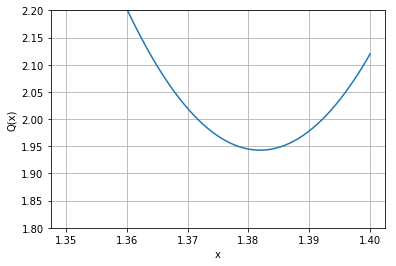

(array([ 1.38191882, -0.18081181,  0.0202952 ]), array([], dtype=float64), 2, array([9.65316119, 2.41173777]))


In [14]:
def Q(x, y, z):
    return (x**2 + y**2 + z**2)

x = np.linspace(1.35, 1.4, 201)
plt.plot(x, Q(x, 10 * x - 14, 21 * x -29))
plt.xlabel('x')
plt.ylabel('Q(x)')
plt.grid(True)
plt.ylim(1.8, 2.2)
plt.show()

A = np.array([[1, 2, -1], [8, -5, 2]])
B = np.array([1,12])

print(np.linalg.lstsq(A,B))

In [15]:
np.round(np.dot(A, [1.38191882, -0.18081181,  0.0202952])) - B

array([0., 0.])

#### 6. Найдите одно из псевдорешений вырожденной системы:

$\begin{equation} 
\begin{pmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9\\
\end{pmatrix} \cdot X = 
\begin{pmatrix}
2\\
5\\
11\\
\end{pmatrix}
\end{equation}$

Попробуйте также отыскать и нормальное псевдорешение.

In [16]:
A = np.array([[1,2,3], [4,5,6], [7,8,9]])
B = np.array([[2,5,11]])
Q, R = np.linalg.qr(A)

C = np.concatenate((A, B.T), axis=1)
print('ранг А =', np.linalg.matrix_rank(A), 'ранг С =', np.linalg.matrix_rank(C))
print('det =', np.round(np.linalg.det(A)))
print(' ')
print (A)
print (Q)
print (R)

ранг А = 2 ранг С = 3
det = -0.0
 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11164740e-15]]


In [17]:
print(np.dot(Q, R))

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [18]:
print(np.round(np.dot(Q.T, Q)))

[[ 1. -0. -0.]
 [-0.  1.  0.]
 [-0.  0.  1.]]


In [19]:
R1 = R[:2, :2]
B = np.array([2,5,11])
B1 = np.dot(Q.T, B)[: 2]
np.round(B1)

array([-12.,   0.])

In [25]:
X1 = np.linalg.solve(R1, B1)
print(np.round(X1))
X = np.append(X1, 0)
print(np.round(X))
np.round(np.linalg.norm(X),2), np.round(np.linalg.norm(np.dot(A, X) - B),2)

[1. 0.]
[1. 0. 0.]


(1.5, 1.22)

In [21]:
np.linalg.lstsq(A, B)

(array([ 1.25,  0.5 , -0.25]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 3.33475287e-16]))

In [22]:
X = [1.25, 0.5, -0.25]
np.round(np.linalg.norm(X),2), np.round(np.linalg.norm(np.dot(A, X) - B),2)

(1.37, 1.22)